- it's better to only have one pic of the same person because then they'll cluster to eachother and cast everyone out of thier neighborhood
- when zia says "I want to find the most dissimilar person from my species" this is how you could find it or test it.
- it also test how close everyone is to themselves i.e. how diverse is your selection
- how close everyone is to you and your family.
- cosine didn't make that much of a difference
- correlation was somewhat interesting but euclidean seems to tbe the bst
- min dist is nice to keep points of the same cluster close together, but it coudl be decieving from a global perspective i.e. how close a cluster is to one another and could make it hard to see as photos get clumped up.
- default settings work just fine

For now we'll use this instead of tsne; it's faster, it's new, and it has better controls than tsne. though from my current perspective it's not too different results

In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from tsne import multithread_map, rescaler
from image_helpers import *
from image_helpers import _square_sizer
from tsne import image_scatter_plot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('CF_ALL_faces_encodings.pickle')
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('friends_and_myself_pics_faces_encodings.pickle')

In [3]:
arrays_rescaled.extend(arrays_rescaled_) , encodings.extend(encodings_), paths.extend(paths_)

(None, None, None)

In [4]:
X = np.concatenate((X, X_))
df = pd.DataFrame().from_csv(
        'tsne_trials/filename_to_rating_lookup_CF_ALL_faces_encoding.csv', 
        index_col=[0]
    ) 
    
dic = dict(zip(df['Filename'], df['Ratings']))
paths=[path.replace('_face', '') for path in paths]
colors_dic = [dic.get(path.split('/')[-1]) for path in paths]

In [5]:
num_of_friends=data_.shape[0]
len(encodings), len(paths), len(arrays_rescaled), X.shape[0], num_of_friends

(757, 757, 757, 757, 16)

In [6]:
colors_pal = sns.color_palette('deep', 5)

tsne_embeddings, xx, yy, lis = map_colors_to_ratings(colors_dic, encodings, colors_pal)

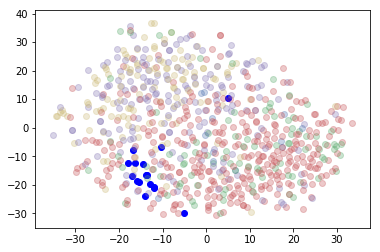

In [7]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    plt.scatter(x, y, color=c, alpha=0.3)

In [34]:
def map_colors_to_ratings_UMAP(colors_dic, encodings, colors_pal):
    from umap import UMAP

    params = {
#          5 to 50, with a choice of 10 to 15 being a sensible default.
        "n_neighbors":5,
#          0.001 to 0.5, with 0.1 being a reasonable default.
 
        "min_dist":0.1,

#         metric: This determines the choice of metric used to measure distance in the input space. 
        "metric":'euclidean'

    }

    tsne_embeddings = UMAP(**params).fit_transform(encodings)

    xx = tsne_embeddings[:, 0]
    yy = tsne_embeddings[:, 1]

    lis=[]
    for depth in colors_dic:
        if depth: 
            lis.append(colors_pal[depth - 1])
        else:
            lis.append(colors_pal[0])

    return tsne_embeddings, xx, yy, lis


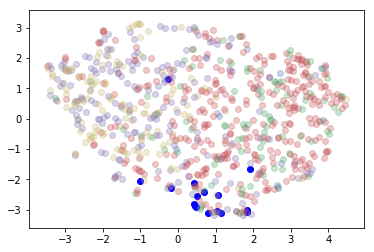

In [35]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    plt.scatter(x, y, color=c, alpha=0.3)

In [36]:


umap_embeddings, xx, yy, lis = map_colors_to_ratings_UMAP(colors_dic, encodings, colors_pal)

/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


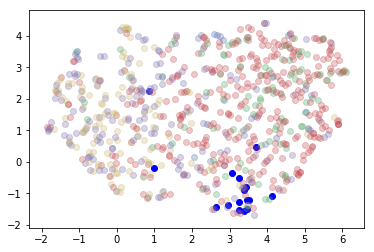

In [37]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    plt.scatter(x, y, color=c, alpha=0.3)

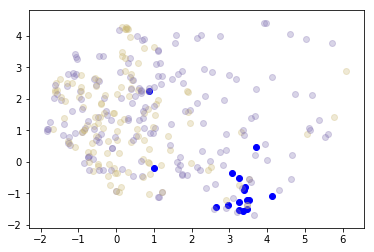

In [38]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    if  c in {colors_pal[3], colors_pal[4]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

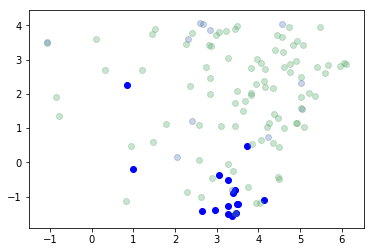

In [39]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 

    if  c in {colors_pal[1], colors_pal[0]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

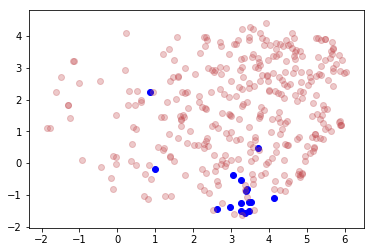

In [40]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b')
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], lis): 
    if  c in {colors_pal[2]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

In [41]:
for _ in range(1,6):
    umap_embeddings, _, _, _ = map_colors_to_ratings_UMAP(colors_dic, encodings, colors_pal)
    plot_data = image_scatter_plot(
                    tsne_scatter_plot=umap_embeddings, 
                    images=X, 
                    res=5000
                )

    print(plot_data.shape)
    im = Image.fromarray(np.uint8(plot_data))
    im.show()
    break


/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


(6557, 5128, 3)
